# **Regresión Lineal**

## **1. Introducción**

La [*regresión lineal*](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal) es un método estadístico que trata de modelar la relación entre una variable continua y una o más variables independientes mediante el ajuste de una ecuación lineal.
$$
\\
Y=\beta_0+\beta_1X_1+...+\beta_mX_m+\epsilon
\\
$$
Se llama [regresión lineal simple](http://eio.usc.es/eipc1/BASE/BASEMASTER/FORMULARIOS-PHP-DPTO/MATERIALES/Mat_50140116_Regr_%20simple_2011_12.pdf) cuando solo hay una variable independiente y [regresión lineal múltiple](http://eio.usc.es/eipc1/BASE/BASEMASTER/FORMULARIOS-PHP-DPTO/MATERIALES/Mat_50140128_RegresionMultiple.pdf) cuando hay más de una. Dependiendo del contexto, a la variable modelada se le conoce como variable dependiente o variable respuesta, y a las variables independientes como regresores, predictores.

<img src=https://economipedia.com/wp-content/uploads/Regresi%C3%B3n-lineal.png>


## **2. Historia**

La primera forma de regresión lineal documentada fue el [método de los mínimos cuadrados](https://es.wikipedia.org/wiki/M%C3%ADnimos_cuadrados) que fue publicada por Legendre en 1805, [Gauss](https://es.wikipedia.org/wiki/Carl_Friedrich_Gauss) publicó un trabajo en donde desarrollaba de manera más profunda el método de los mínimos cuadrados,y en dónde se incluía una versión del [teorema de Gauss-Márkov](https://es.wikipedia.org/wiki/Teorema_de_Gauss-M%C3%A1rkov).

El término regresión se utilizó por primera vez en el estudio de variables antropométricas: al comparar la estatura de padres e hijos, donde resultó que los hijos cuyos padres tenían una estatura muy superior al valor medio, tendían a igualarse a este, mientras que aquellos cuyos padres eran muy bajos tendían a reducir su diferencia respecto a la estatura media; es decir, "regresaban" al promedio.La constatación empírica de esta propiedad se vio reforzada más tarde con la justificación teórica de ese fenómeno.

El término lineal se emplea para distinguirlo del resto de técnicas de regresión, que emplean modelos basados en cualquier clase de función matemática. Los modelos lineales son una explicación simplificada de la realidad, mucho más ágiles y con un soporte teórico mucho más extenso por parte de la matemática y la estadística.

Pero bien, como se ha dicho, se puede usar el término lineal para distinguir modelos basados en cualquier clase de aplicación.


## **3. Algoritmo y ejemplo**

Para el desarrollo del algoritmo, se tomara como guia un ejemplo, en el cual se explicara paso por paso el desarrollo del algoritmo utilizado.

**[Ejemplo:](https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html)** Supóngase que un analista de deportes quiere saber si existe una relación entre el número de veces que batean los jugadores de un equipo de béisbol y el número de runs que consigue. En caso de existir y de establecer un modelo, podría predecir el resultado del partido

### **3.1 Librerias**

Se inicia por importar las [*Librerias*](https://tutorial.recursospython.com/libreria-estandar/#:~:text=La%20librer%C3%ADa%20est%C3%A1ndar%20es%20un,se%20distribuyen%20junto%20con%20Python.&text=Encontrar%C3%A1s%20la%20lista%20de%20todos,colecci%C3%B3n%20de%20operaciones%20matem%C3%A1ticas%20com%C3%BAnes.) que se van a utilizar:

In [14]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### **3.2 Leer los datos**

Leemos los datos y lo cargamos como un dataset de Pandas.

In [2]:
# Datos
# ==============================================================================
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})
datos.head(3)

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787


### **3.3 Representacion Grafica**

El primer paso antes de generar un modelo de regresión simple es representar los datos para poder intuir si existe una relación y cuantificar dicha relación mediante un coeficiente de correlación.

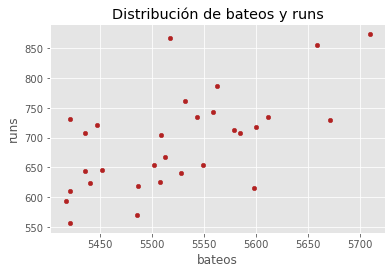

In [3]:
fig, ax = plt.subplots(figsize=(6, 3.84))

datos.plot(
    x    = 'bateos',
    y    = 'runs',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de bateos y runs');

In [4]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = datos['bateos'], y =  datos['runs'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.6106270467206685
P-value:  0.0003388351359791999


El gráfico y el test de correlación muestran una relación lineal, de intensidad considerable (r = 0.61) y significativa (p-value = 0.000339). Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir el número de runs en función del número de bateos del equipo.

### **3.4 Ajuste del Modelo**

Se ajusta un modelo empleando como variable respuesta **runs** y como predictor **bateos**. Como en todo estudio predictivo, no solo es importante ajustar el modelo, sino también cuantificar su capacidad para predecir nuevas observaciones. Para poder hacer esta evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de test.

In [5]:
# División de los datos en train y test
# ==============================================================================
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [6]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [-2367.7028413]
Coeficiente: [('bateos', 0.5528713534479736)]
Coeficiente de determinación R^2: 0.3586119899498744


Una vez entrenado el modelo, se evalúa la capacidad predictiva empleando el conjunto de test.

In [7]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[643.78742093]
 [720.0836677 ]
 [690.78148597]]

El error (rmse) de test es: 59.336716083360486


### **3.5 Statsmodels**

La implementación de regresión lineal de Statsmodels, es más completa que la de Scikitlearn ya que, además de ajustar el modelo, permite calcular los test estadísticos y análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa este tipo de modelos. Statsmodels tiene dos formas de entrenar el modelo:
+ Indicando la fórmula del modelo y pasando los datos de entrenamiento como un dataframe que incluye la variable respuesta y los predictores. Esta forma es similar a la utilizada en R.
+ Pasar dos matrices, una con los predictores y otra con la variable respuesta. Esta es igual a la empleada por Scikitlearn con la diferencia de que a la matriz de predictores hay que añadirle una primera columna de 1s.

In [8]:
# División de los datos en train y test
# ==============================================================================
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [9]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     8.191
Date:                Sun, 07 Mar 2021   Prob (F-statistic):            0.00906
Time:                        00:47:34   Log-Likelihood:                -134.71
No. Observations:                  24   AIC:                             273.4
Df Residuals:                      22   BIC:                             275.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2367.7028   1066.357     -2.220      0.0

### **3.6 Intervalos de Confianza de los Coeficientes**

In [10]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[-4.57919205e+03, -1.56213633e+02],
       [ 1.52244180e-01,  9.53498527e-01]])

### **3.7 Predicciones**

Una vez entrenado el modelo, se pueden obtener predicciones para nuevos datos. Los modelos de statsmodels permiten calcular las predicciones de dos formas:
+ **.predict()**: Devuelve únicamente el valor de las predicciones.
+ **.get_prediction().summary_frame()**: Devuelve, además de las predicciones, los intervalos de confianza asociados.

In [11]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,768.183475,32.658268,700.454374,835.912577,609.456054,926.910897
1,646.551778,19.237651,606.655332,686.448224,497.558860,795.544695
2,680.276930,14.186441,650.856053,709.697807,533.741095,826.812765
3,735.011194,22.767596,687.794091,782.228298,583.893300,886.129088


### **3.8 Representacion Grafica del Modelo**

Además de la línea de mínimos cuadrados, es recomendable incluir los límites superior e inferior del intervalo de confianza. Esto permite identificar la región en la que, según el modelo generado y para un determinado nivel de confianza, se encuentra el valor promedio de la variable respuesta.

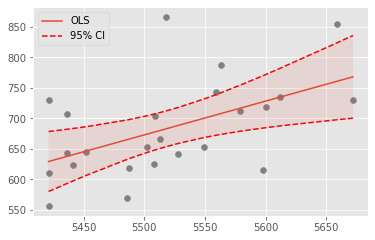

In [12]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [13]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 59.3367160833608


### **3.9 Interpretacion**

La columna $(coef)$ devuelve el valor estimado para los dos parámetros de la ecuación del modelo lineal $( β^0$  y  $β^1 )$ que equivalen a la ordenada en el origen (*intercept* o *const*) y a la pendiente. Se muestran también los errores estándar, el valor del estadístico t y el p-value (dos colas) de cada uno de los dos parámetros. Esto permite determinar si los predictores son significativamente distintos de $0$, es decir, que tienen importancia en el modelo. Para el modelo generado, tanto la ordenada en el origen como la pendiente son significativas $$(p-values < 0.05)$$

El valor de *R-squared* indica que el modelo es capaz de explicar el $27.1\%$ de la variabilidad observada en la variable respuesta (*runs*). Además, el $p-value$ obtenido en el test F $(Prob (F-statistic) = 0.00906)$ indica que sí hay evidencias de que la varianza explicada por el modelo es superior a la esperada por azar (varianza total).

El modelo lineal generado sigue la ecuación:
$$
runs=-2367.7028+0.6305\,\,bateos
$$

Por cada unidad que se incrementa el número de bateos, el número de runs aumenta en promedio $0.6305$ unidades.

El error de test del modelo es de $59.34$. Las predicciones del modelo final se alejan en promedio $59.34$ unidades del valor real.

## **4. Enlaces**

- [Regresión lineal](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal).
- [Regresión Lineal: teoría y ejemplos en Python](https://www.iartificial.net/regresion-lineal-con-ejemplos-en-python/).
- [Regresión lineal con Python](https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html).
- [Regresión Lineal en español con Python](https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/)